# Exploratory Data Analysis (EDA) – Global Cruise Ship Dataset
- This notebook analyzes a cleaned global cruise ship dataset to uncover patterns in ship size, capacity, age, ship type, and operational characteristics, enabling comparisons across cruise lines and highlighting structural trends in the global cruise industry
- The EDA focuses on distributions, correlations, group-level comparisons, and statistical testing (including correlation analysis and regression-based tests) to support clear, data-driven insights

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
from scipy import stats
sns.set_style("whitegrid")

In [92]:
df = pd.read_csv("../data/cruise_ships_eda.csv")
# we will look at the general columns information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1566 entries, 0 to 1565
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    1566 non-null   object 
 1   year_built              1566 non-null   int64  
 2   age                     1458 non-null   float64
 3   gross_tonnage           1362 non-null   float64
 4   passengers_clean        1528 non-null   float64
 5   crew                    1439 non-null   float64
 6   cabins                  1455 non-null   float64
 7   length_m                1562 non-null   float64
 8   beam_m                  1543 non-null   float64
 9   speed_kn                1518 non-null   float64
 10  decks_clean             1519 non-null   float64
 11  decks_with_cabins       742 non-null    float64
 12  operator                1566 non-null   object 
 13  owner                   1566 non-null   object 
 14  flag_state              1566 non-null   

In [80]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_built,1566.0,2004.906769,17.032320,1907.000000,1997.000000,2008.000000,2018.000000,2030.000000
age,1450.0,21.438621,15.812895,1.000000,9.000000,19.000000,29.000000,100.000000
gross_tonnage,1362.0,34097.325991,46856.134206,11.000000,3140.000000,12194.000000,45923.000000,250800.000000
passengers_clean,1528.0,943.393979,1310.825940,4.000000,123.000000,191.000000,1482.750000,6813.000000
crew,1416.0,294.062147,469.880129,5.000000,39.000000,56.500000,300.000000,2394.000000
cabins,1455.0,374.452234,580.753250,2.000000,63.000000,95.000000,382.500000,2896.000000
length_m,1562.0,157.211588,79.873352,18.000000,105.000000,135.000000,205.000000,365.000000
beam_m,1543.0,21.881724,10.864457,4.000000,12.000000,21.000000,29.000000,73.000000
speed_kn,1518.0,15.967260,7.085229,6.000000,12.000000,14.600000,19.575000,102.300000
decks_clean,1519.0,8.416722,10.259647,1.000000,4.000000,6.000000,11.000000,300.000000


### Data Quality Note ###
- Some ships had implausible ages (e.g., 9000 years), which correspond to planned or future builds in the source website. 
These values were treated as invalid and set to missing to avoid skewing the analysis.
- Crew size contained extreme outliers due to scraping errors. I used domain knowledge to cap impossible values and retained realistic observations for analysis.

In [84]:
# Count outliers before cleaning
print("DATA CLEANING SUMMARY")
print("="*60)
print(f"Ships with crew > 2500: {(df['crew'] > 3000).sum()} rows")
print(f"Ships with crew < 5: {(df['crew'] < 5).sum()} rows")
print(f"Ships with age > 100: {(df['age'] > 100).sum()} rows")

# Clean outliers directly in original columns
df.loc[df["crew"] > 2500, "crew"] = np.nan  # Extreme outliers
df.loc[df["crew"] < 5, "crew"] = np.nan     # Unrealistically small
df.loc[df["age"] > 100, "age"] = np.nan     # Implausible ages

print("\nCLEANING COMPLETE")
print("="*60)
print(f"Remaining ships with valid crew: {df['crew'].notna().sum()}")
print(f"Remaining ships with valid age: {df['age'].notna().sum()}")

DATA CLEANING SUMMARY
Ships with crew > 2500: 0 rows
Ships with crew < 5: 0 rows
Ships with age > 100: 0 rows

CLEANING COMPLETE
Remaining ships with valid crew: 1416
Remaining ships with valid age: 1450


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year_built,1566.0,2004.906769,17.032320,1907.0,1997.0,2008.0,2018.000,2030.0
age,1450.0,21.438621,15.812895,1.0,9.0,19.0,29.000,100.0
gross_tonnage,1362.0,34097.325991,46856.134206,11.0,3140.0,12194.0,45923.000,250800.0
passengers_clean,1528.0,943.393979,1310.825940,4.0,123.0,191.0,1482.750,6813.0
crew,1416.0,294.062147,469.880129,5.0,39.0,56.5,300.000,2394.0
cabins,1455.0,374.452234,580.753250,2.0,63.0,95.0,382.500,2896.0
length_m,1562.0,157.211588,79.873352,18.0,105.0,135.0,205.000,365.0
beam_m,1543.0,21.881724,10.864457,4.0,12.0,21.0,29.000,73.0
speed_kn,1518.0,15.967260,7.085229,6.0,12.0,14.6,19.575,102.3
decks_clean,1519.0,8.416722,10.259647,1.0,4.0,6.0,11.000,300.0


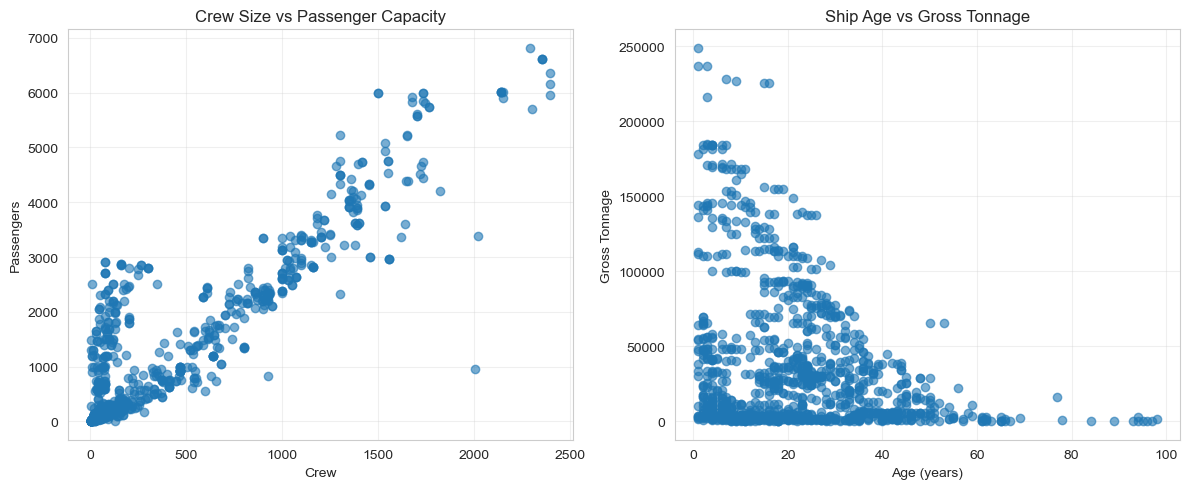

In [91]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# 1) Crew vs Passengers
axes[0].scatter(df['crew'], df['passengers_clean'], alpha=0.6)
axes[0].set_title('Crew Size vs Passenger Capacity')
axes[0].set_xlabel('Crew')
axes[0].set_ylabel('Passengers')
axes[0].grid(True, alpha=0.3)

# 2) Age vs Gross Tonnage
axes[1].scatter(df['age'], df['gross_tonnage'], alpha=0.6)
axes[1].set_title('Ship Age vs Gross Tonnage')
axes[1].set_xlabel('Age (years)')
axes[1].set_ylabel('Gross Tonnage')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Crew Size vs Passenger Capacity
- The scatter plot shows a strong positive relationship between crew size and passenger capacity. As passenger capacity increases, crew size generally increases as well, indicating that staffing scales with ship size to support onboard operations and service levels.

- However, the relationship is not perfectly linear, with noticeable dispersion among larger ships. This suggests that while crew size is a key driver of passenger capacity, operational strategy, ship type, and service standards also influence staffing requirements.

- Key takeaway: Larger ships require more crew, but staffing intensity varies across ships, reflecting differences in service models and cruise line practices.

### Ship Age vs Gross Tonnage
- The relationship between ship age and gross tonnage appears weak and non-linear. Newer ships tend to span a wide range of gross tonnage values, while older ships are generally smaller, though with notable exceptions.

- This pattern suggests that ship size is driven more by design and market positioning than by age alone. While recent decades have seen the introduction of very large vessels, ship age by itself does not strongly predict gross tonnage.

- Key takeaway: Gross tonnage is influenced primarily by ship design and cruise line strategy rather than vessel age.

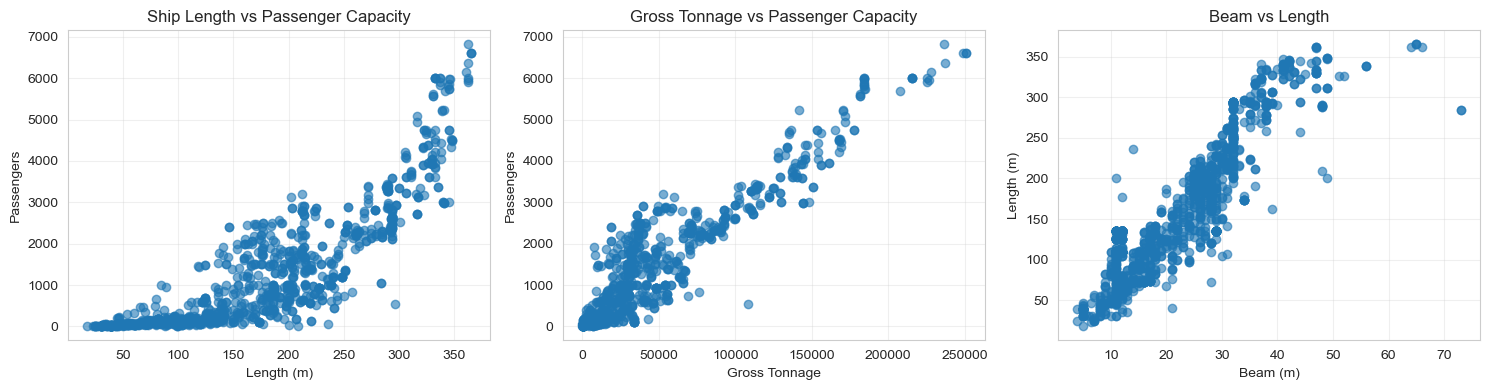

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# 1) Length vs Passengers
axes[0].scatter(df['length_m'], df['passengers_clean'], alpha=0.6)
axes[0].set_title('Ship Length vs Passenger Capacity')
axes[0].set_xlabel('Length (m)')
axes[0].set_ylabel('Passengers')
axes[0].grid(True, alpha=0.3)

# 2) Gross Tonnage vs Passengers
axes[1].scatter(df['gross_tonnage'], df['passengers_clean'], alpha=0.6)
axes[1].set_title('Gross Tonnage vs Passenger Capacity')
axes[1].set_xlabel('Gross Tonnage')
axes[1].set_ylabel('Passengers')
axes[1].grid(True, alpha=0.3)

# 3) Beam vs Length
axes[2].scatter(df['beam_m'], df['length_m'], alpha=0.6)
axes[2].set_title('Beam vs Length')
axes[2].set_xlabel('Beam (m)')
axes[2].set_ylabel('Length (m)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Ship Dimensions and Passenger Capacity  
   - Across the three visualizations, passenger capacity is shown to scale primarily with overall ship size and volume rather than any single physical dimension. Both ship length and gross tonnage exhibit positive relationships with passenger capacity, with gross tonnage displaying the strongest and most consistent association, reflecting its role as a comprehensive measure of internal volume.

- The relationship between beam and length further illustrates that cruise ship dimensions scale proportionally, following standardized design and engineering constraints. This proportional scaling explains why length alone does not fully capture passenger capacity, as ships of similar length can differ in width, layout, and internal volume.

- Overall takeaway: Passenger capacity is driven by total ship volume and design efficiency, with gross tonnage serving as the most informative single indicator among the examined dimensions.

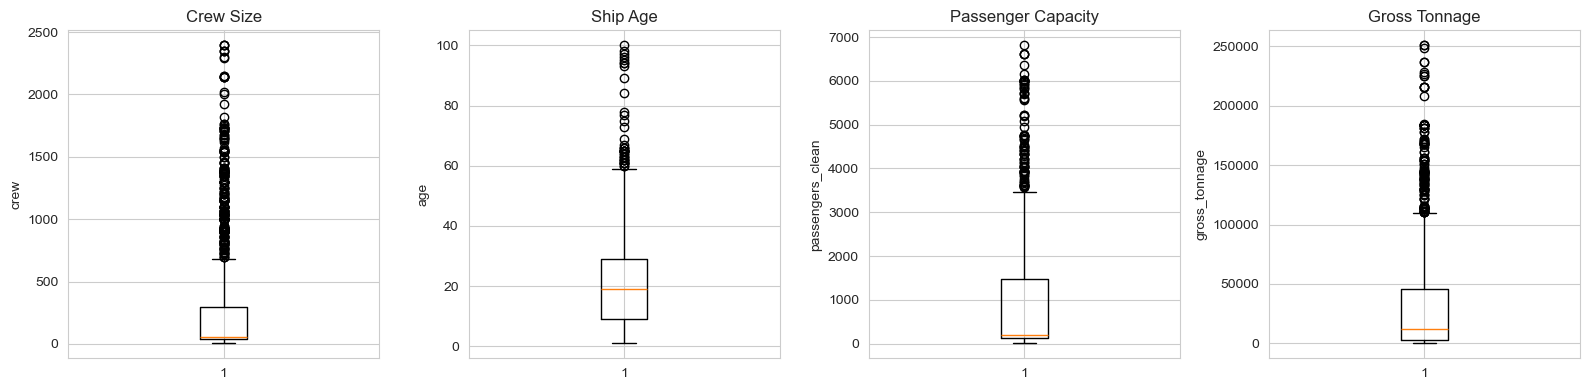

In [26]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))

metrics = ['crew', 'age', 'passengers_clean', 'gross_tonnage']
titles = ['Crew Size', 'Ship Age', 'Passenger Capacity', 'Gross Tonnage']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    axes[idx].boxplot(df[metric].dropna())
    axes[idx].set_title(title)
    axes[idx].set_ylabel(metric)

plt.tight_layout()
plt.show()

### Distribution of Key Ship Characteristics

- The boxplots summarize the distributions of crew size, ship age, passenger capacity, and gross tonnage, highlighting both central tendencies and the presence of outliers across the global cruise fleet.

- All four variables exhibit right-skewed distributions, with a relatively small number of ships at the high end of size and capacity. In particular, passenger capacity and gross tonnage show substantial dispersion and extreme upper outliers, reflecting the existence of a limited number of mega-ships that are significantly larger than the rest of the fleet.

- Ship age displays a wider spread, indicating a mix of older vessels and newer builds currently in operation. Crew size follows a similar pattern to passenger capacity, suggesting that staffing levels scale with ship size while still varying across ship types and service models.

- Overall takeaway: The cruise fleet is highly heterogeneous, with most ships clustered at smaller to mid-range sizes and a small number of very large vessels driving the upper extremes. This skewness and presence of outliers should be considered in downstream analysis and modeling, including the potential use of transformations or robust metrics.

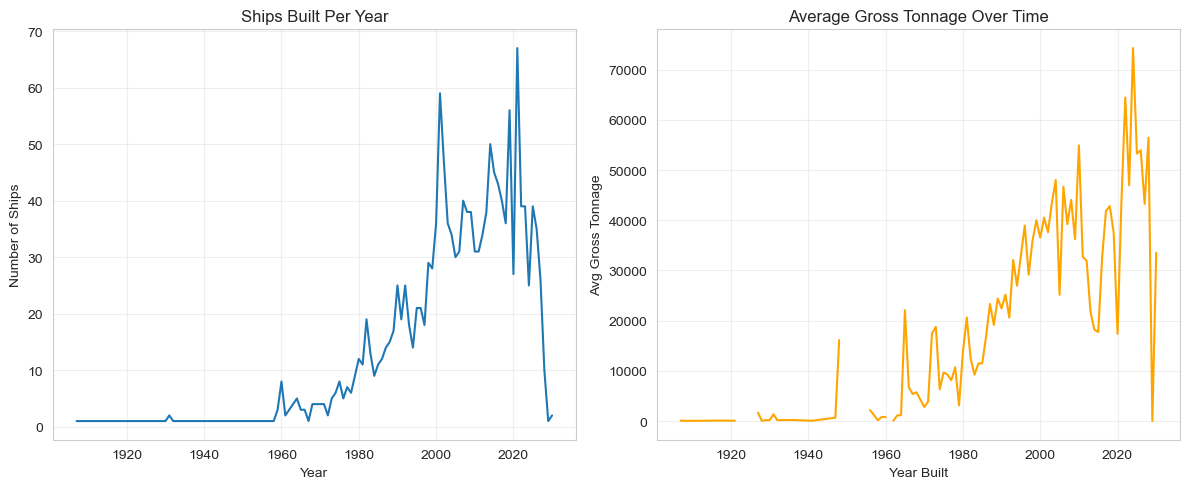

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Ships built per year
df['year_built'].value_counts().sort_index().plot(ax=axes[0])
axes[0].set_title('Ships Built Per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Ships')
axes[0].grid(True, alpha=0.3)

# Average size over time
df.groupby('year_built')['gross_tonnage'].mean().plot(ax=axes[1], color='orange')
axes[1].set_title('Average Gross Tonnage Over Time')
axes[1].set_xlabel('Year Built')
axes[1].set_ylabel('Avg Gross Tonnage')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

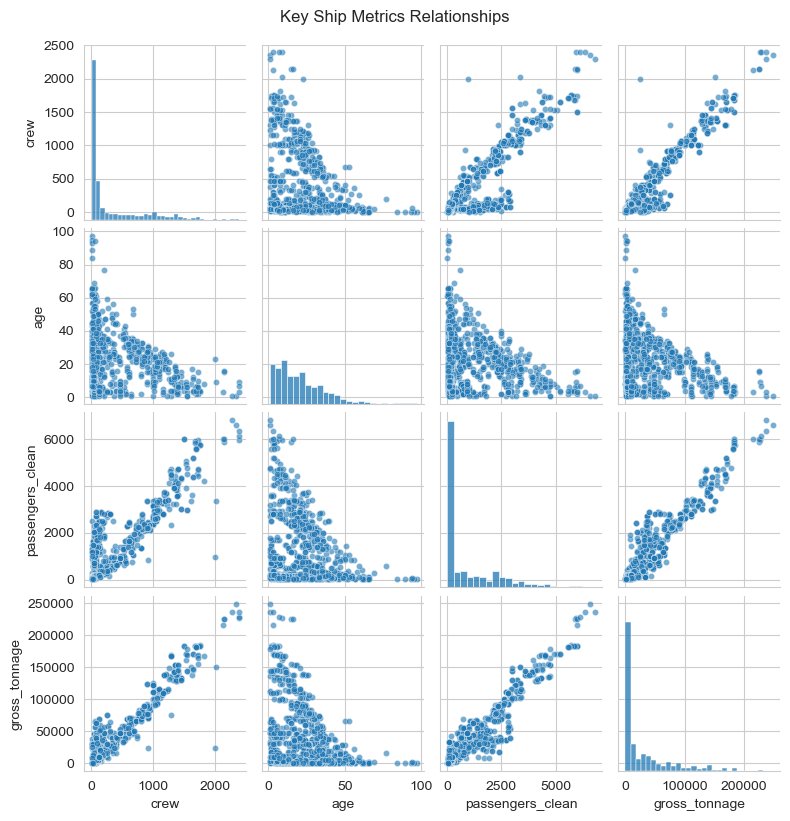

In [28]:
# Just the 4 most important metrics
key_vars = ['crew', 'age', 'passengers_clean', 'gross_tonnage']

sns.pairplot(df[key_vars].dropna(), 
             height=2,
             plot_kws={'alpha': 0.6, 's': 20})
plt.suptitle('Key Ship Metrics Relationships', y=1.02)
plt.show()

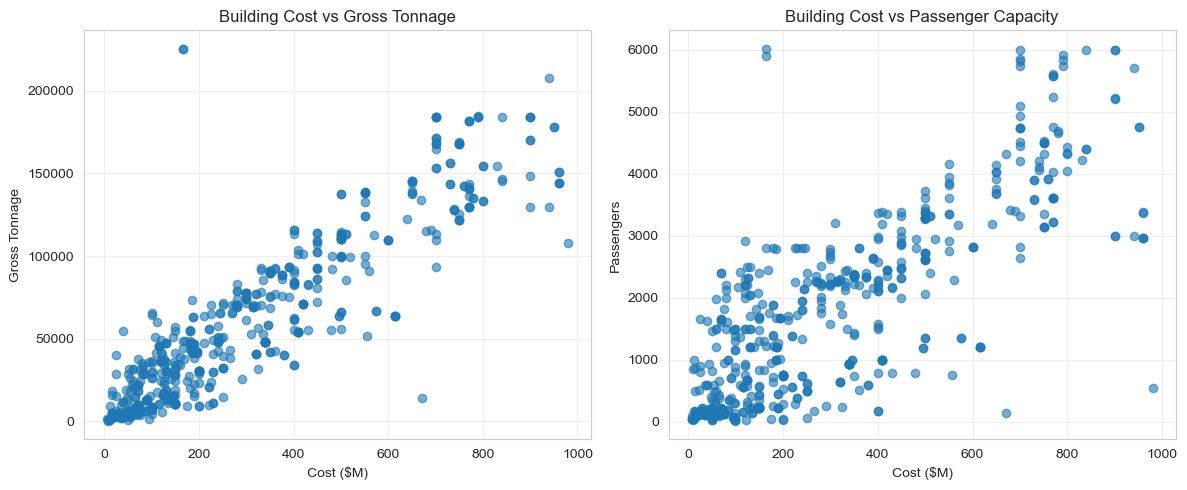

In [29]:
if 'building_cost_million' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    
    # Cost vs Gross Tonnage
    axes[0].scatter(df['building_cost_million'], df['gross_tonnage'], alpha=0.6)
    axes[0].set_title('Building Cost vs Gross Tonnage')
    axes[0].set_xlabel('Cost ($M)')
    axes[0].set_ylabel('Gross Tonnage')
    axes[0].grid(True, alpha=0.3)
    
    # Cost vs Passengers
    axes[1].scatter(df['building_cost_million'], df['passengers_clean'], alpha=0.6)
    axes[1].set_title('Building Cost vs Passenger Capacity')
    axes[1].set_xlabel('Cost ($M)')
    axes[1].set_ylabel('Passengers')
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

In [36]:
# 1. Create derived metrics
df['crew_per_passenger'] = df['crew'] / df['passengers_clean']
df['tonnage_per_passenger'] = df['gross_tonnage'] / df['passengers_clean']
# Only keep rows with valid values for clustering
df_cluster = df[["gross_tonnage", "passengers_clean"]].dropna()

# 2. Cluster analysis - find natural groups
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df.loc[df_cluster.index, "cluster"] = kmeans.fit_predict(df_cluster)

# 3. Statistical tests
# Test if newer ships are larger
new_ships = df[df['year_built'] > 2010]['gross_tonnage']
old_ships = df[df['year_built'] <= 2010]['gross_tonnage']
t_stat, p_value = stats.ttest_ind(new_ships.dropna(), old_ships.dropna())
print(f"New vs old ships size difference p-value: {p_value:.4f}")

New vs old ships size difference p-value: 0.0007


C:\Users\Lian\Miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1425: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [65]:
# Q1: What's the average crew-to-passenger ratio?
print(f"Avg crew per passenger: {df['crew'].mean()/df['passengers_clean'].mean():.3f}")

# Q2: Are newer ships faster?
new_speed = df[df['year_built'] > 2010]['speed_kn'].mean()
old_speed = df[df['year_built'] <= 2010]['speed_kn'].mean()
print(f"New ships speed: {new_speed:.1f} knots, Old ships: {old_speed:.1f} knots")

# Q3: Top 10 largest ships
print("\nTop 10 largest ships by gross tonnage:")
df["owner"] = (
    df.groupby("name")["owner"]
      .transform(lambda x: x.ffill().bfill())
)
top10 = df.nlargest(10, "gross_tonnage")[["name", "gross_tonnage", "passengers_clean", "owner"]]
top10

Avg crew per passenger: 0.312
New ships speed: 15.1 knots, Old ships: 16.7 knots

Top 10 largest ships by gross tonnage:


,name,gross_tonnage,passengers_clean,owner
550,Legend Of The Seas,250800.0,6605.0,Rcg-Royal Caribbean Group (Via Rccl-Royal Cari...
1288,Star Of The Seas,250800.0,6605.0,Rcg-Royal Caribbean Group (Via Rccl-Royal Cari...
505,Icon Of The Seas,248655.0,6605.0,Rcg-Royal Caribbean Group (Via Rccl-Royal Cari...
1548,Wonder Of The Seas,236857.0,6361.0,Rcg-Royal Caribbean Group (Via Rccl-Royal Cari...
1387,Utopia Of The Seas,236473.0,6813.0,Rcg-Royal Caribbean Group (Via Rccl-Royal Cari...
1341,Symphony Of The Seas,228081.0,6149.0,Rcg-Royal Caribbean Group (Via Rccl-Royal Cari...
488,Harmony Of The Seas,226963.0,5953.5,Rcg-Royal Caribbean Group (Via Rccl-Royal Cari...
57,Allure Of The Seas,225282.0,5903.0,Rcg-Royal Caribbean Group (Via Rccl-Royal Cari...
1050,Oasis Of The Seas,225282.0,6011.5,Rcg-Royal Caribbean Group (Via Rccl-Royal Cari...
946,MSC World America,215863.0,6007.0,Mediterranean Shipping Company (Msc Group)


CORRELATION MATRIX:
                  crew   age  passengers_clean  gross_tonnage  length_m  \
crew              1.00 -0.14              0.92           0.95      0.86   
age              -0.14  1.00             -0.16          -0.22     -0.23   
passengers_clean  0.92 -0.16              1.00           0.95      0.86   
gross_tonnage     0.95 -0.22              0.95           1.00      0.90   
length_m          0.86 -0.23              0.86           0.90      1.00   
speed_kn          0.26  0.07              0.35           0.25      0.38   

                  speed_kn  
crew                  0.26  
age                   0.07  
passengers_clean      0.35  
gross_tonnage         0.25  
length_m              0.38  
speed_kn              1.00  


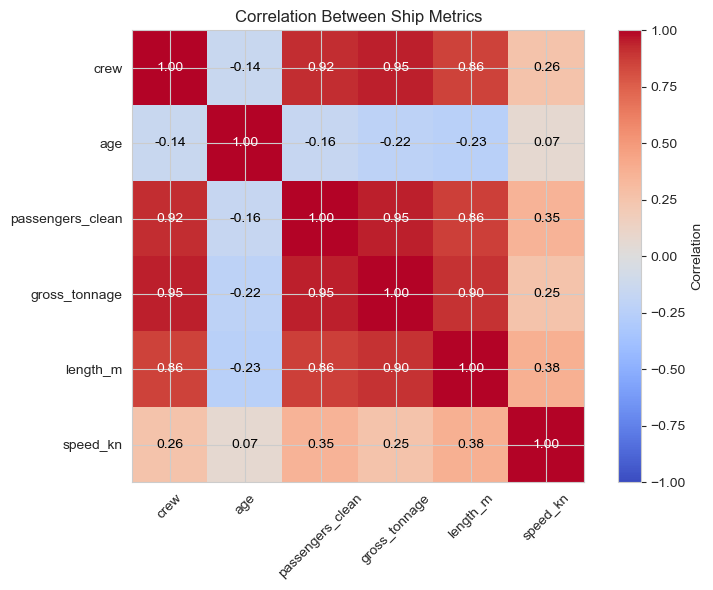

KEY INSIGHTS:
1. Median crew-to-passenger ratio: 1:2.9 (or 0.351 crew per passenger)
2. Median space per passenger: 27.8 gross tons
3. Correlation between speed and size: 0.253

4. Top 5 ships by space per passenger (luxury):
                     name  tonnage_per_passenger  passengers_clean
        Kontio icebreaker             588.833333              12.0
          Otso icebreaker             588.833333              12.0
CCGS Terry Fox icebreaker             423.400000              10.0
  SCF Sakhalin icebreaker             382.333333              18.0
    NS Arktika icebreaker             349.375000              96.0

5. Most efficient (passengers per crew):
                     name  passengers_per_crew  crew  passengers_clean
        Mega Regina ferry           277.777778   9.0            2500.0
       Blue Horizon ferry           248.000000   6.0            1488.0
        Finnclipper ferry           216.666667   6.0            1300.0
              Wawel ferry           142.857143

In [34]:
# Calculate correlations
corr_matrix = df[['crew', 'age', 'passengers_clean', 'gross_tonnage', 
                  'length_m', 'speed_kn']].corr()

print("CORRELATION MATRIX:")
print("="*50)
print(corr_matrix.round(2))

# Visualize
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title('Correlation Between Ship Metrics')

# Add correlation values
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                ha='center', va='center', color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

plt.tight_layout()
plt.show()
print("KEY INSIGHTS:")
print("="*50)

# Q1: Crew ratios
median_ratio = df['crew_per_passenger'].median()
print(f"1. Median crew-to-passenger ratio: 1:{1/median_ratio:.1f} (or {median_ratio:.3f} crew per passenger)")

# Q2: Luxury indicator (space per passenger)
median_space = df['tonnage_per_passenger'].median()
print(f"2. Median space per passenger: {median_space:.1f} gross tons")

# Q3: Speed vs size correlation
speed_size_corr = df['speed_kn'].corr(df['gross_tonnage'])
print(f"3. Correlation between speed and size: {speed_size_corr:.3f}")

# Q4: Top performers
print("\n4. Top 5 ships by space per passenger (luxury):")
luxury_ships = df.nlargest(5, 'tonnage_per_passenger')[['name', 'tonnage_per_passenger', 'passengers_clean']]
print(luxury_ships.to_string(index=False))

print("\n5. Most efficient (passengers per crew):")
df['passengers_per_crew'] = df['passengers_clean'] / df['crew']
efficient_ships = df.nlargest(5, 'passengers_per_crew')[['name', 'passengers_per_crew', 'crew', 'passengers_clean']]
print(efficient_ships.to_string(index=False))

In [52]:
def extract_ship_type(name):
    name = str(name).lower()
    if "ferry" in name:
        return "Ferry"
    elif "icebreaker" in name:
        return "Icebreaker"
    elif "barge" in name:
        return "River Cruise"
    elif "river" in name:
        return "River Cruise"
    elif "cruise" in name:
        return "Cruise"
    else:
        return "Cruise"
df["ship_type"] = df["name"].apply(extract_ship_type)
df["ship_type"].value_counts()

ship_type
Cruise          1190
Ferry            262
Icebreaker        63
River Cruise      51
Name: count, dtype: int64

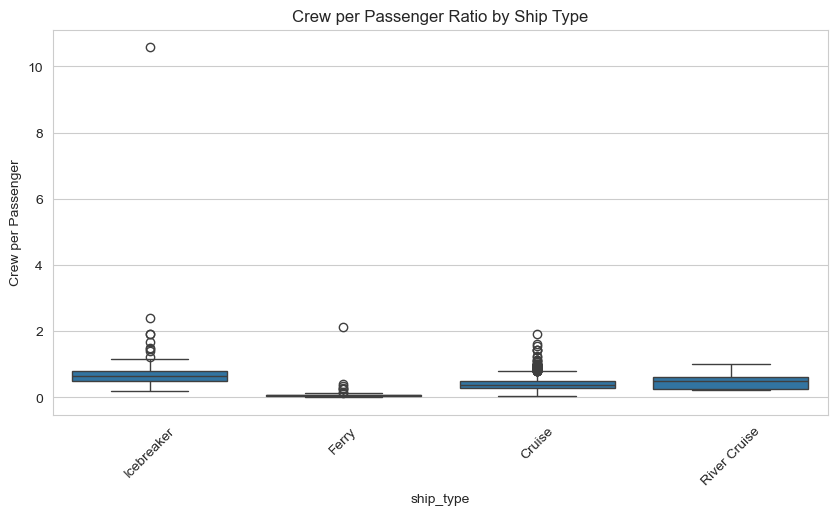

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="ship_type", y="crew_per_passenger")
plt.title("Crew per Passenger Ratio by Ship Type")
plt.xticks(rotation=45)
plt.ylabel("Crew per Passenger")
plt.show()

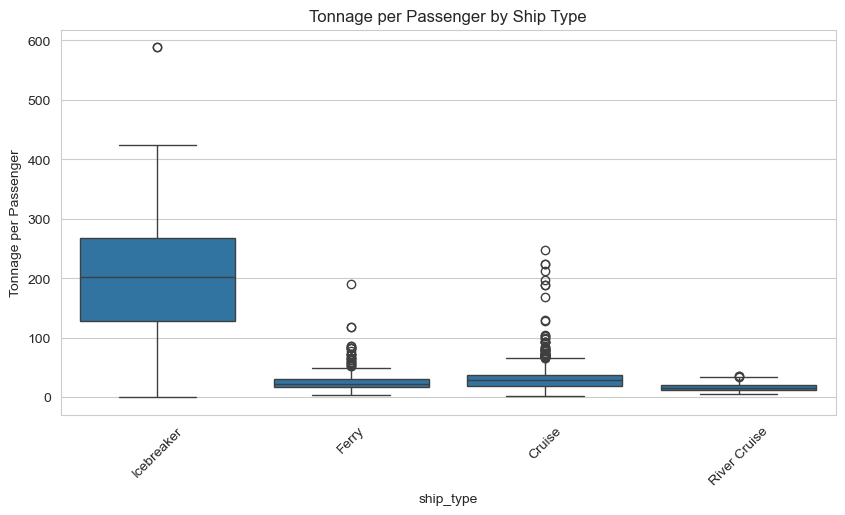

In [44]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="ship_type", y="tonnage_per_passenger")
plt.title("Tonnage per Passenger by Ship Type")
plt.xticks(rotation=45)
plt.ylabel("Tonnage per Passenger")
plt.show()

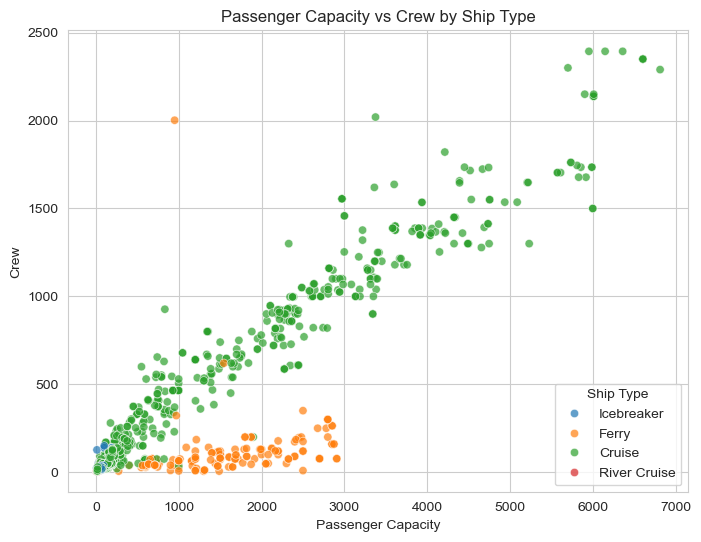

In [42]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="passengers_clean",
    y="crew",
    hue="ship_type",
    alpha=0.7
)
plt.title("Passenger Capacity vs Crew by Ship Type")
plt.xlabel("Passenger Capacity")
plt.ylabel("Crew")
plt.legend(title="Ship Type")
plt.show()

p-value (Ferry vs Icebreaker space per passenger): 0.0000


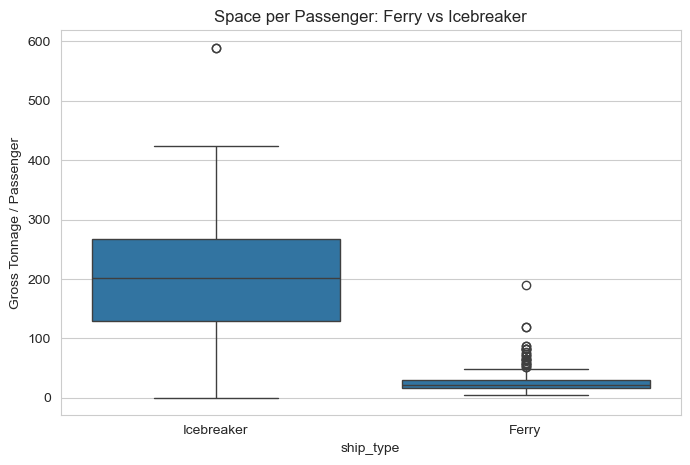

In [47]:
ferry = df[df["ship_type"] == "Ferry"]["tonnage_per_passenger"].dropna()
icebreaker = df[df["ship_type"] == "Icebreaker"]["tonnage_per_passenger"].dropna()

t_stat, p_val = ttest_ind(ferry, icebreaker, equal_var=False)
print(f"p-value (Ferry vs Icebreaker space per passenger): {p_val:.4f}")
plt.figure(figsize=(8, 5))
sns.boxplot(data=df[df["ship_type"].isin(["Ferry", "Icebreaker"])],
            x="ship_type",
            y="tonnage_per_passenger")
plt.title("Space per Passenger: Ferry vs Icebreaker")
plt.ylabel("Gross Tonnage / Passenger")
plt.show()


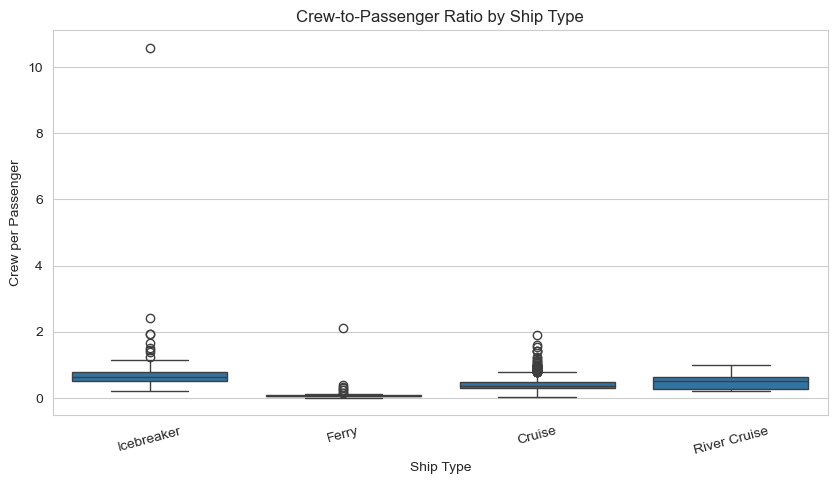

Crew-to-Passenger Ratio (Cruise vs River): p-value = 0.1215


In [56]:
df['crew_per_passenger'] = df['crew'] / df['passengers_clean']
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="ship_type", y="crew_per_passenger")
plt.title("Crew-to-Passenger Ratio by Ship Type")
plt.xlabel("Ship Type")
plt.ylabel("Crew per Passenger")
plt.xticks(rotation=15)
plt.show()
cruise_ratio = df[df["ship_type"] == "Cruise"]["crew_per_passenger"].dropna()
river_ratio = df[df["ship_type"] == "River Cruise"]["crew_per_passenger"].dropna()

from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(cruise_ratio, river_ratio, equal_var=False)
print(f"Crew-to-Passenger Ratio (Cruise vs River): p-value = {p_value:.4f}")

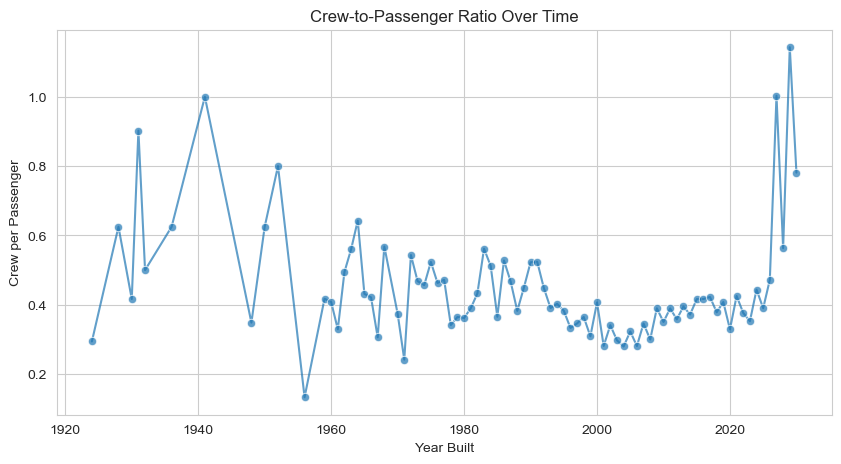

In [54]:
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=df.sort_values("year_built"),
    x="year_built",
    y="crew_per_passenger",
    errorbar=None,
    marker="o",
    alpha=0.7
)
plt.title("Crew-to-Passenger Ratio Over Time")
plt.xlabel("Year Built")
plt.ylabel("Crew per Passenger")
plt.grid(True)
plt.show()

In [55]:
from scipy.stats import linregress

valid = df[["year_built", "crew_per_passenger"]].dropna()
slope, intercept, r_value, p_value, std_err = linregress(valid["year_built"], valid["crew_per_passenger"])

print(f"Slope: {slope:.4f} | R²: {r_value**2:.4f} | p-value: {p_value:.4f}")

Slope: -0.0001 | R²: 0.0000 | p-value: 0.8659


I tested whether newer cruise ships have different crew-to-passenger ratios using linear regression. 
The results showed no statistically significant relationship, with an R² near zero and a high p-value. 
This suggests that staffing ratios are driven more by service standards, ship class, or cruise line policies rather than ship age alone.

In [90]:
df.to_csv(
    "../data/cruise_ships_enriched_ml_ready.csv",
    index=False
)